## INSTRUCTIONS 

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution. 

The homework consists of two parts:
1. Data from our lives	
2. Data manipulation/Exploratory Data Analysis
3. Multipe regression Analysis

Follow the prompts in the attached jupyter notebook. Download the data and place it in your working directory, or modify the path to upload it to your notebook. Add markdown cells to your analysis to include your solutions, comments, answers. **Add as many cells as you need**, for easy readability comment when possible.
Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

Submission: Send in both a ipynb and a pdf file of your work. 

Good luck!


## 1. Data from our Lives

### Describe a situation or problem from your job, everyday life, current events, etc., for which a regression model would be appropriate. List some (up to 5) predictors that you might use.

A situation where a regression model would be appropriate is predicting the final GPA at the end of the academic year.        
**<u>The factors that can influence a students GPA are:</u>**

1. **Exam Scores:** The results of midterm exams and assignments can be important predictors of the final GPA, as they reflect a student's performance.

2. **Study Hours**: The number of hours a student spends studying is predictor of their GPA. More study time often results in better grades.

3. **Previous GPA:** A student's GPA from the previous year or semester is a strong predictor of their future performance.

4. **Use of Resources:** Utilizing available resources like tutoring, academic advisors, study groups, and academic support services can positively 
    impact a student's performance.

## The data

**Title: 1985 Auto Imports Database**

Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota,volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")

In [5]:
from scipy import stats
# from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from ipywidgets import interactive
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
import statistics
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [6]:
#Read in data
df =pd.read_csv('auto_imports1.csv')
df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


## 2. Data 

## 2.1 Munging

Check what types of variables do you have in your data? Do you see anything that doesn't make sense? *Hint: horse power is  an object ?!*

In [ ]:
#Checing types of data
# df.dtypes
df.info()

### Replace '?' with None



In [ ]:
rows = df[df.eq('?').any(axis=1)].index # getting index of rows which have '?' as value
rows

In [ ]:
df[51:57]

In [ ]:
df=df.replace('?', None) # replacing '?' values with None. 

In [ ]:
df[51:57]

In [ ]:
df[df.eq('?').any(axis=1)].index # checking if any '?' values are remaining

### Change the variables: bore, stroke, horse_power, peak_rpm to float64

In [ ]:
## Changing datatype of above columns to float64 [NONE VALUES WILL BE CONVERTED TO NAN]
df=df.astype({'bore': 'float64','stroke': 'float64', 'horse_power': 'float64', 'peak_rpm': 'float64'})

In [ ]:
df.info()

In [ ]:
df[51:58]

### Drop body,engine_type,cylinders columns and name the new dataframe df2

In [ ]:
## Dropping above columns
df2=df.drop(['body','engine_type','cylinders'], axis=1)

In [ ]:
df2.head()

In [ ]:
df2.info()

### Drop all nan values

In [ ]:
## Dropping rows with NaN value
df2 = df2.dropna()
df2.reset_index(drop=True,inplace=True)

In [ ]:
df2.isnull().sum() # checking count of Nan/null values in all columns

In [ ]:
df2.to_csv(df2.csv)

### Get dummy variables for fuel_type within df2 drop first level

In [20]:
## Creating dummies
# pd.get_dummies(df2, columns=['fuel_type'], drop_first=True)
dummy = pd.get_dummies(df2['fuel_type'], drop_first=True, dtype='int64',prefix='fuel_type')
df2 = pd.concat([df2, dummy], axis=1)
display(df2.head())

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,1
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,1
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,1
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,1
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,1


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fuel_type      195 non-null    object 
 1   wheel_base     195 non-null    float64
 2   length         195 non-null    float64
 3   width          195 non-null    float64
 4   heights        195 non-null    float64
 5   curb_weight    195 non-null    int64  
 6   engine_size    195 non-null    int64  
 7   bore           195 non-null    float64
 8   stroke         195 non-null    float64
 9   comprassion    195 non-null    float64
 10  horse_power    195 non-null    float64
 11  peak_rpm       195 non-null    float64
 12  city_mpg       195 non-null    int64  
 13  highway_mpg    195 non-null    int64  
 14  price          195 non-null    int64  
 15  fuel_type_gas  195 non-null    int64  
dtypes: float64(9), int64(6), object(1)
memory usage: 24.5+ KB


## 2.2 EDA on df2

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Follow the lecture notes for ideas of how to perform EDA on your dataset. For help, here are the steps we talked about:

Suggested Steps in EDA:

    Provide descriptions of your sample and features
    Check for missing data
    Identify the shape of your data
    Identify significant correlations
    Spot/deal with outliers in the dataset

These steps are a guidline. Try different things and share your insights about the dataset (**df2**).

Don't forget to add "markdown" cells to include your findings or to explain what you are doing


In [22]:
## Your EDA should start here
df2.shape # Number of rows and columns

(195, 16)

In [23]:
df2.info() #data types in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fuel_type      195 non-null    object 
 1   wheel_base     195 non-null    float64
 2   length         195 non-null    float64
 3   width          195 non-null    float64
 4   heights        195 non-null    float64
 5   curb_weight    195 non-null    int64  
 6   engine_size    195 non-null    int64  
 7   bore           195 non-null    float64
 8   stroke         195 non-null    float64
 9   comprassion    195 non-null    float64
 10  horse_power    195 non-null    float64
 11  peak_rpm       195 non-null    float64
 12  city_mpg       195 non-null    int64  
 13  highway_mpg    195 non-null    int64  
 14  price          195 non-null    int64  
 15  fuel_type_gas  195 non-null    int64  
dtypes: float64(9), int64(6), object(1)
memory usage: 24.5+ KB


In [24]:
df2.describe() # basic statistics of the dataset

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385,0.897436
std,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093,0.304170
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000
25%,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000,1.000000
50%,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000,1.000000
75%,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000,1.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000


In [25]:
df2.isnull().sum() # checking if any null values exist.

fuel_type        0
wheel_base       0
length           0
width            0
heights          0
curb_weight      0
engine_size      0
bore             0
stroke           0
comprassion      0
horse_power      0
peak_rpm         0
city_mpg         0
highway_mpg      0
price            0
fuel_type_gas    0
dtype: int64

In [26]:
df2.drop_duplicates() # dropping dupliacte rows 

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,1
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,1
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,1
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,1
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,gas,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845,1
191,gas,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045,1
192,gas,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485,1
193,diesel,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470,0


In [27]:
df2.fuel_type.unique() # types of fuel in the dataset

array(['gas', 'diesel'], dtype=object)

In [28]:
df2.groupby('fuel_type').mean() # Find average value of features for different fuel types

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
fuel_type,,,,,,,,,,,,,,,
diesel,104.390000,182.010000,67.430000,55.835,2898.800000,135.700000,3.374500,3.485500,22.005000,84.450000,4435.000000,30.300000,34.750000,15838.15,0.0
gas,98.268571,173.370857,65.709714,53.636,2520.165714,127.051429,3.324229,3.223429,8.845257,105.422857,5175.428571,24.811429,30.394286,12952.00,1.0


In [29]:
print('Number of gas vehicel data: ',df2['fuel_type'].value_counts()['gas'])# checking if the dataset is balanced, by going through fuel type of data
print('Number of diesel vehicel data: ',df2['fuel_type'].value_counts()['diesel'])

Number of gas vehicel data:  175
Number of diesel vehicel data:  20


Text(0.5, 1.0, 'Number of Gas cars Vs Diesel cars')

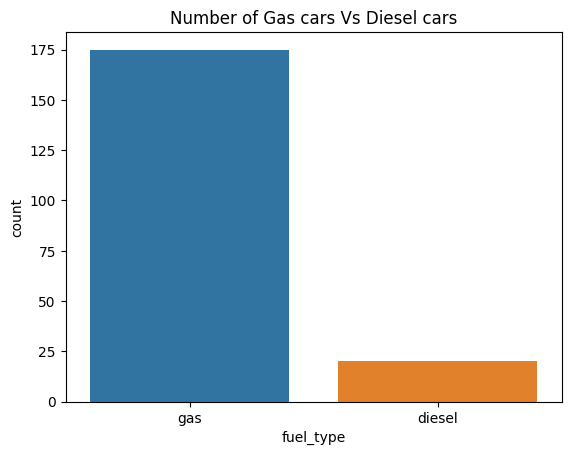

In [30]:
sns.countplot(x='fuel_type', data=df2 ).set_title('Number of Gas cars Vs Diesel cars') # plotting items of fuel_type column

[Text(0.5, 1.0, 'Horse Power Vs Price')]

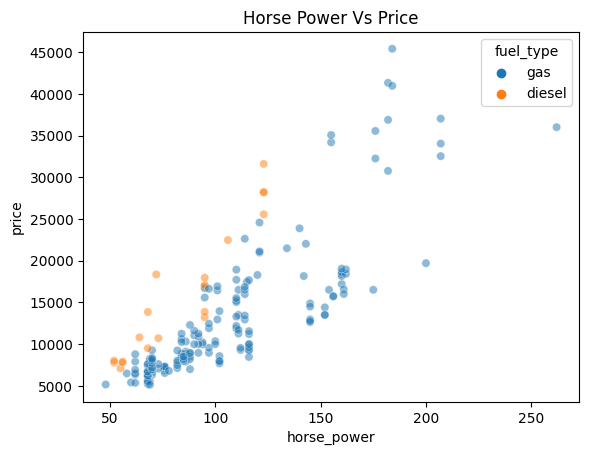

In [31]:
sns.scatterplot(x='horse_power',y='price',data=df2, hue='fuel_type', alpha=0.5).set(title='Horse Power Vs Price')

[Text(0.5, 1.0, 'Curb weight Vs Highway Mileage')]

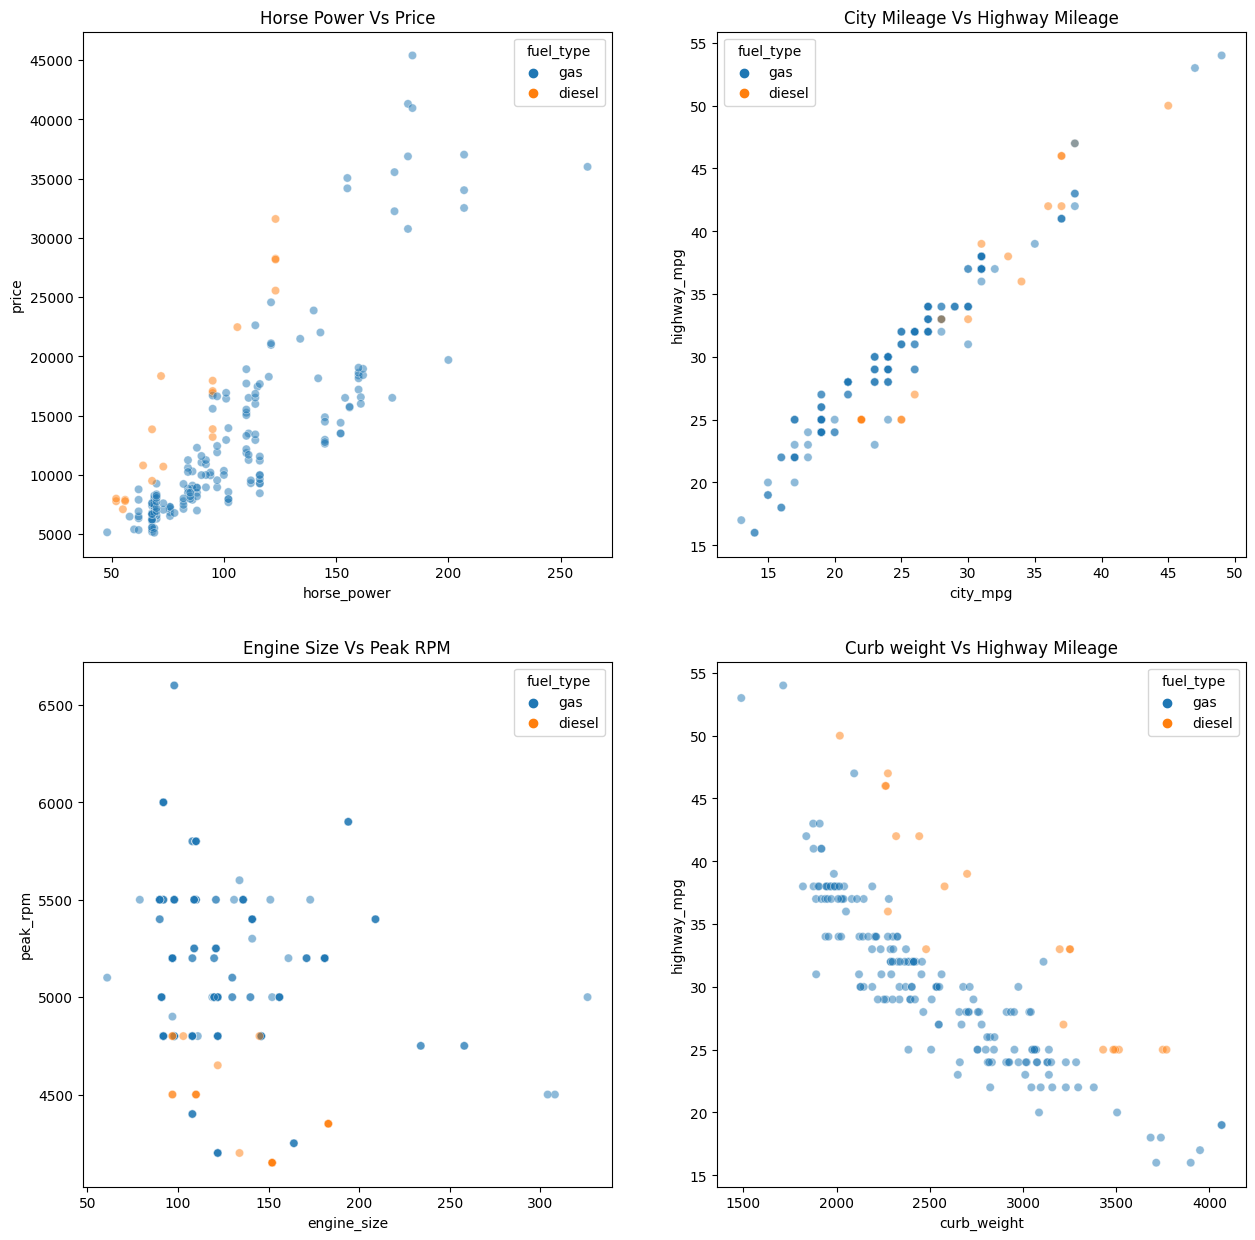

In [32]:
# using subplot to organise the plots
fig = plt.figure(figsize=(15, 15))
# plt.figure(1)
ax1 = fig.add_subplot(221)
sns.scatterplot(x='horse_power',y='price',data=df2, hue='fuel_type', alpha=0.5).set(title='Horse Power Vs Price')
#plt.figure(2)
ax2 = fig.add_subplot(222)
sns.scatterplot(x='city_mpg',y='highway_mpg',data=df2, hue='fuel_type', alpha=0.5).set(title='City Mileage Vs Highway Mileage')
# plt.figure(3)
ax3 = fig.add_subplot(223)
sns.scatterplot(x='engine_size',y='peak_rpm',data=df2, hue='fuel_type', alpha=0.5).set(title='Engine Size Vs Peak RPM')
# plt.figure(4)
ax4 = fig.add_subplot(224)
sns.scatterplot(x='curb_weight',y='highway_mpg',data=df2, hue='fuel_type', alpha=0.5).set(title='Curb weight Vs Highway Mileage')

In [33]:
# Pair plot
# sns.pairplot(df2, hue='fuel_type')

C:\Users\Chirag\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


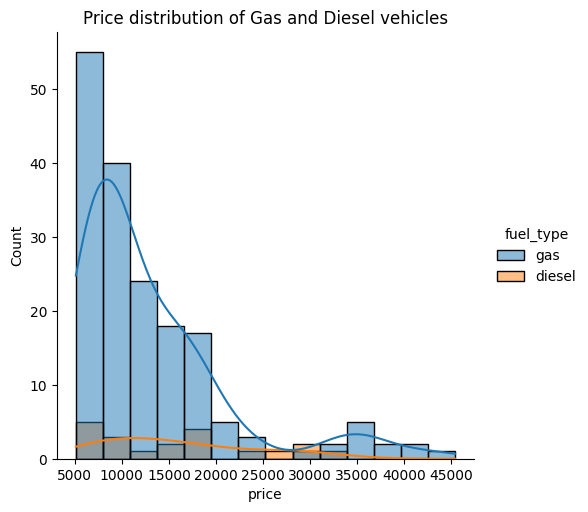

In [34]:
#distribution plot using kernel densitity estimatin(kde)
sns.displot(data=df2, x="price", kde=True, hue='fuel_type').set(title='Price distribution of Gas and Diesel vehicles')

[Text(0.5, 1.0, 'Radial visualization of Car features')]

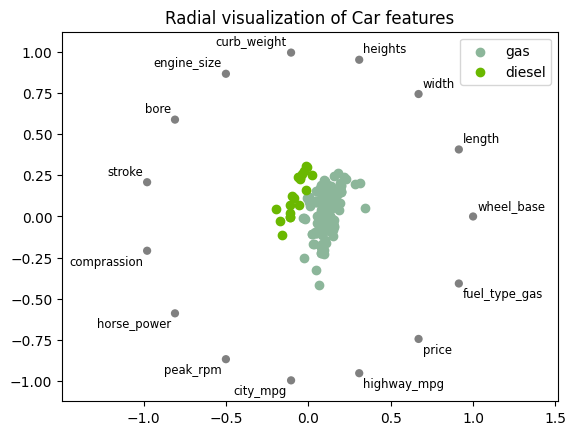

In [35]:
# Radial Visualization
import pandas.plotting as pdplt
pdplt.radviz(df2, 'fuel_type').set(title='Radial visualization of Car features')

[Text(0.5, 1.0, 'Variability in the Data')]

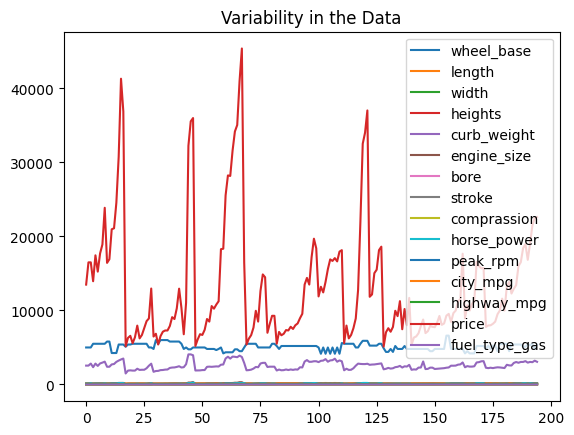

In [36]:
# visualizing Variability
df2.plot().set(title='Variability in the Data')

In [37]:
df2_corr= df2.drop(columns='fuel_type') # removing fuel_type column since its a string and cant be used for correlation
df2_corr

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845,1
191,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045,1
192,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485,1
193,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470,0


In [38]:
# mean = statistics.mean(df2['horse_power']) 
# sd = statistics.stdev(df2['horse_power']) 
# plt.plot(df2['horse_power'], norm.pdf(df2['horse_power'], mean, sd)) 
'''THIS PART WAS USED TO CHECK IF THE FEATURE COLUMNS DATA ARE NORMALLY DISTRIBUTED. WE SEE MOST FEATURES ARE NORMALLY DISTRIBUTED 
BASED ON THIS WE CAN CHOOSE TO USE PEARSON METHOD TO ESTIMATE CORRELATION. '''
print("")

In [39]:
# df2_corr.corr(method='pearson')
# df2_corr.corr(method='kendall')
# df2_corr.corr(method='spearman')

In [40]:
df2_corr.corr(method='pearson')

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
wheel_base,1.000000,0.879222,0.819009,0.592500,0.782720,0.569704,0.498228,0.171722,0.247730,0.375541,-0.352331,-0.499126,-0.566355,0.585793,-0.303643
length,0.879222,1.000000,0.858084,0.496218,0.881665,0.687479,0.609437,0.118664,0.160172,0.583813,-0.280986,-0.689660,-0.719324,0.695331,-0.210618
width,0.819009,0.858084,1.000000,0.315834,0.867315,0.740320,0.544311,0.186432,0.190997,0.616779,-0.251627,-0.647099,-0.692220,0.754273,-0.245375
heights,0.592500,0.496218,0.315834,1.000000,0.307732,0.031286,0.189283,-0.055525,0.261160,-0.084412,-0.264078,-0.102367,-0.151188,0.138291,-0.279070
curb_weight,0.782720,0.881665,0.867315,0.307732,1.000000,0.857573,0.645806,0.172785,0.155382,0.760285,-0.278944,-0.772171,-0.812710,0.835729,-0.219488
engine_size,0.569704,0.687479,0.740320,0.031286,0.857573,1.000000,0.583091,0.211989,0.024617,0.842691,-0.219008,-0.710624,-0.732138,0.888942,-0.063490
bore,0.498228,0.609437,0.544311,0.189283,0.645806,0.583091,1.000000,-0.066793,0.003057,0.568527,-0.277662,-0.591950,-0.600040,0.546873,-0.056245
stroke,0.171722,0.118664,0.186432,-0.055525,0.172785,0.211989,-0.066793,1.000000,0.199882,0.100040,-0.068300,-0.027641,-0.036453,0.093746,-0.253774
comprassion,0.247730,0.160172,0.190997,0.261160,0.155382,0.024617,0.003057,0.199882,1.000000,-0.214401,-0.444582,0.331413,0.267941,0.069500,-0.985398
horse_power,0.375541,0.583813,0.616779,-0.084412,0.760285,0.842691,0.568527,0.100040,-0.214401,1.000000,0.105654,-0.834117,-0.812917,0.811027,0.168454


<Axes: >

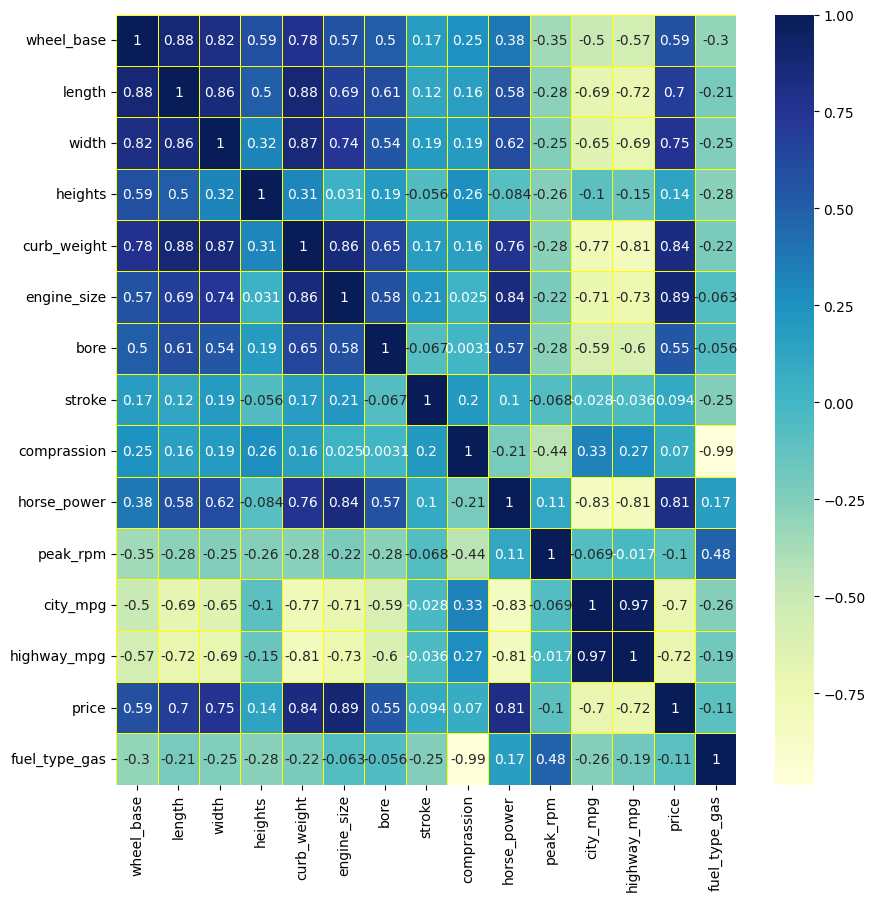

In [41]:
#correlation heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df2_corr.corr(method='pearson'), annot=True, cmap="YlGnBu", linewidths=0.5,linecolor='yellow')

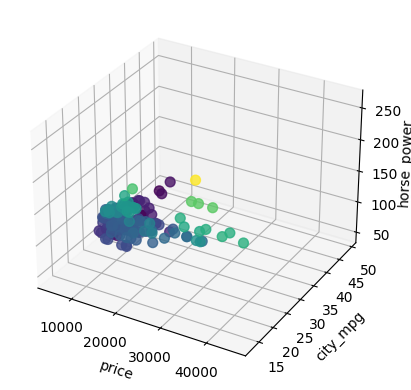

In [42]:
x=df2['price']
y=df2['city_mpg']
z=df2['horse_power']
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('price')
ax.set_ylabel('city_mpg')
ax.set_zlabel('horse_power',labelpad=-0.4)
ax.scatter3D(x, y, z, c=z, cmap='viridis',s=50, alpha=0.8)

## Outlier detection and removal

Index(['wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price', 'fuel_type_gas'],
      dtype='object')


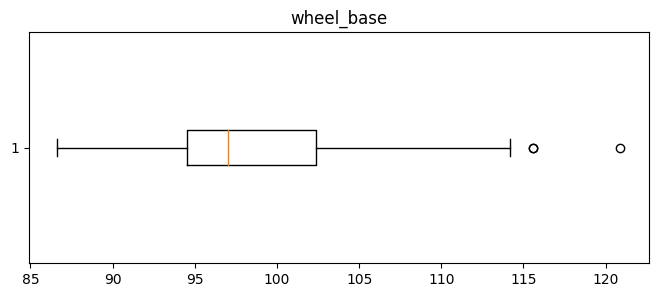

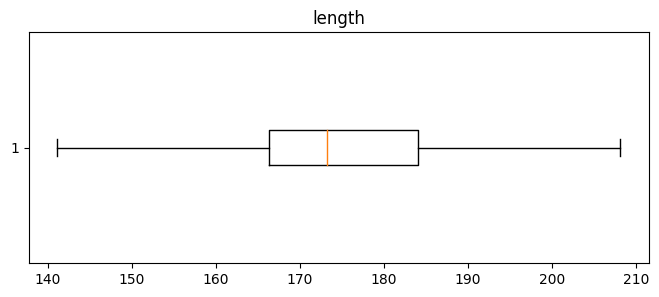

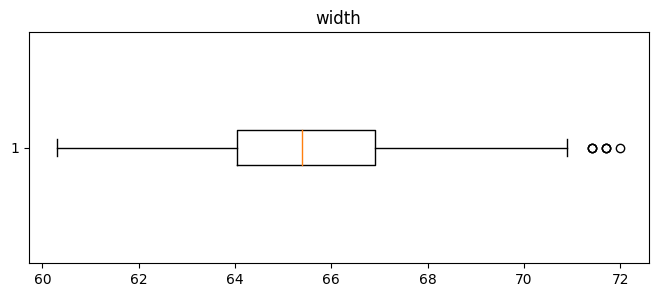

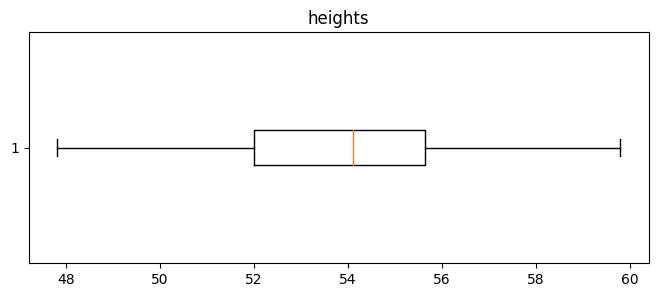

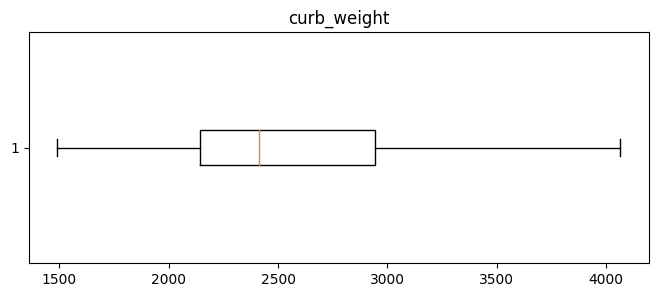

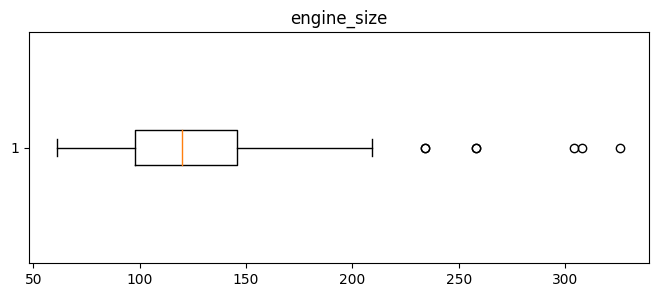

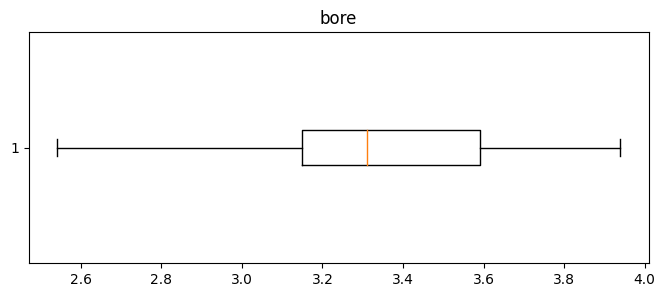

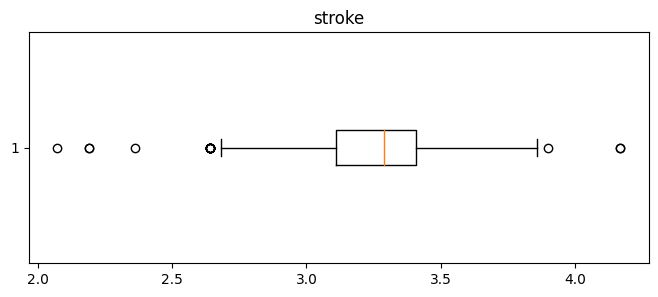

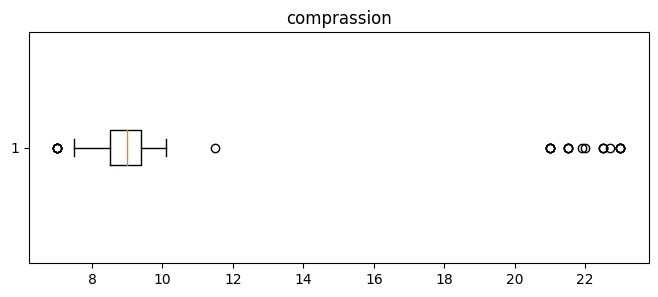

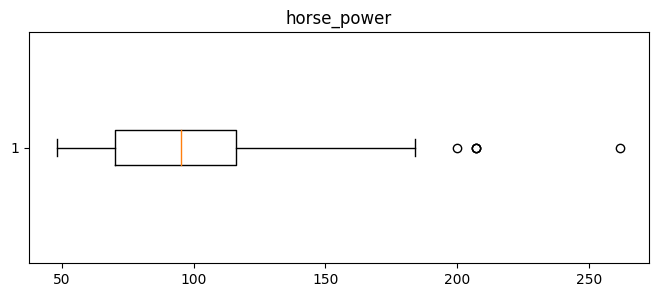

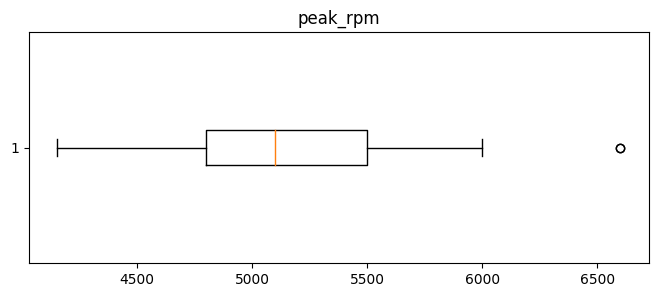

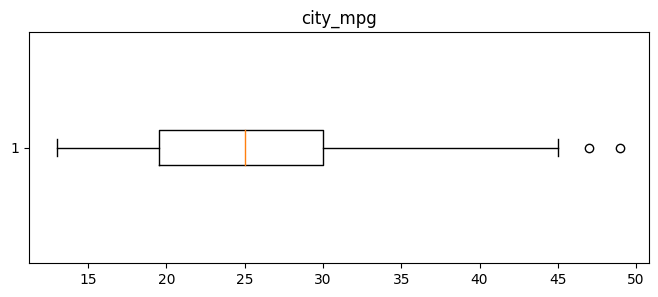

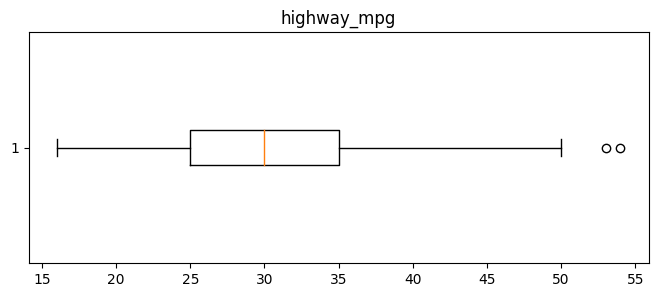

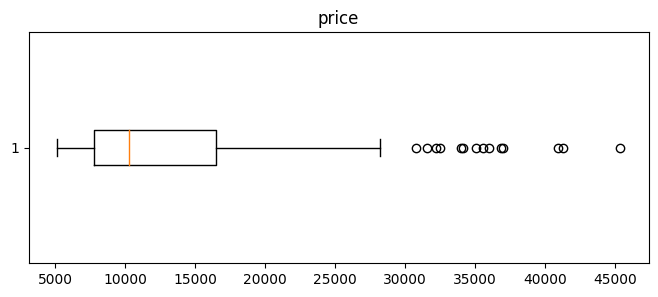

In [43]:
# using box plot to check for outliers in the dataset
print(df2_corr.columns)
#fuel_type_gas column isnt not considered since it is of ordinal type
for i in df2_corr.columns[:-1]:
    plt.figure(figsize=(8,3))
    plt.boxplot(df2[[i]],vert=False)
    plt.title(i)
    plt.show()

In [44]:
# removing outliers
df3=df2_corr.copy()
# df3=df3[:-1]
df3.columns[:-1]

Index(['wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [45]:
# Finding quartiles and IQR
for i in df3.columns[:-1]:    
    q1= df3[i].quantile(0.25) #First quartile
    q3=df3[i].quantile(0.75)# 3rd quartile
    iqr=q3 - q1  # finding IQR
    upper= q3 + (1.5*iqr) #upper limit formula
    lower= q1 - (1.5*iqr) #lower limit formula
    print(upper,lower)
    #capping and Filterting data based in upper and lower limits
    df3.loc[(df3[i]> upper), i ]=upper
    df3.loc[(df3[i]< lower), i ]=lower

114.25000000000001 82.64999999999999
210.675 139.675
71.17500000000001 59.774999999999984
61.125000000000014 46.52499999999999
4141.25 947.25
216.75 26.75
4.25 2.49
3.8600000000000003 2.6599999999999993
10.75 7.1499999999999995
185.0 1.0
6550.0 3750.0
45.75 3.75
50.0 10.0
29637.75 -5372.25


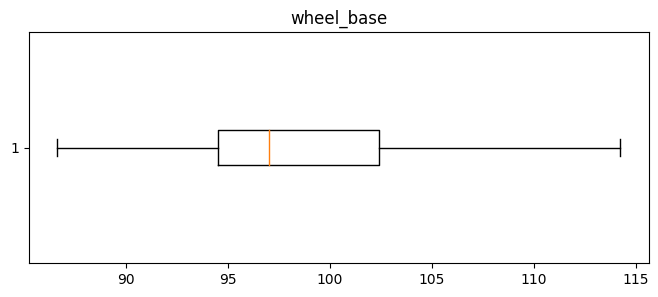

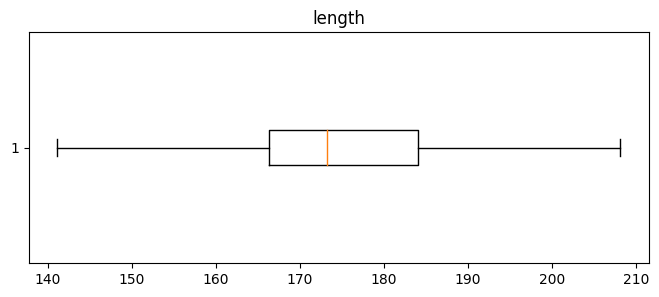

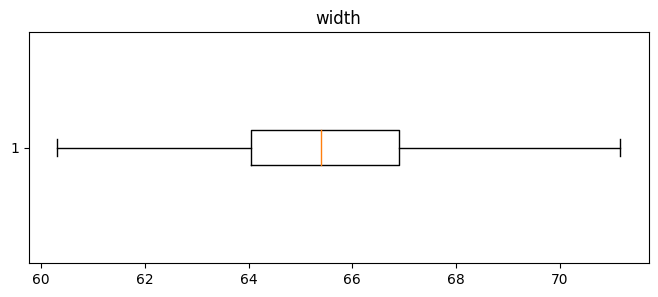

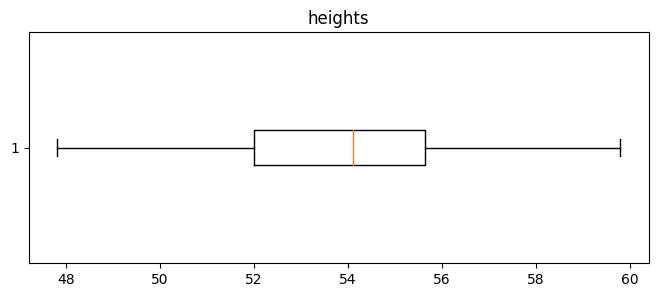

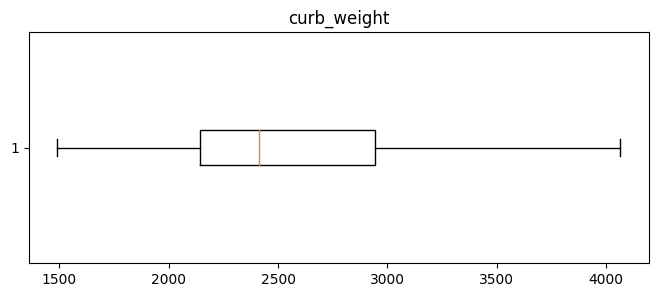

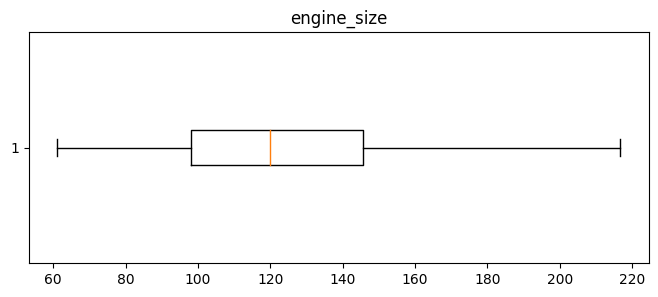

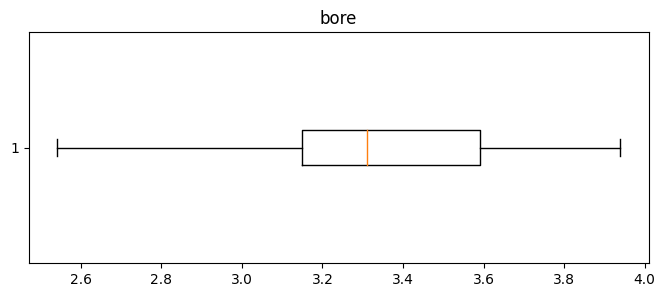

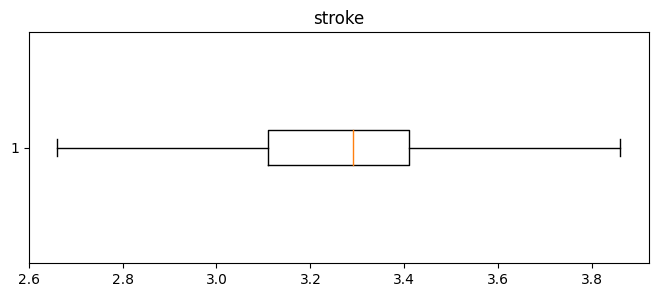

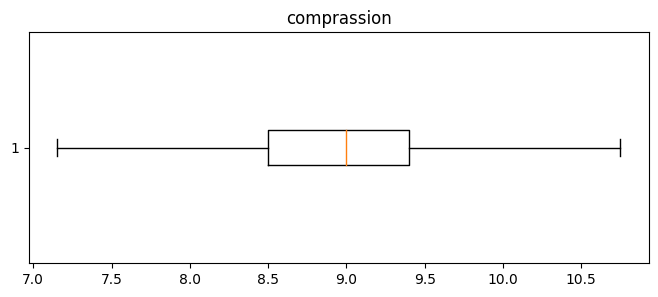

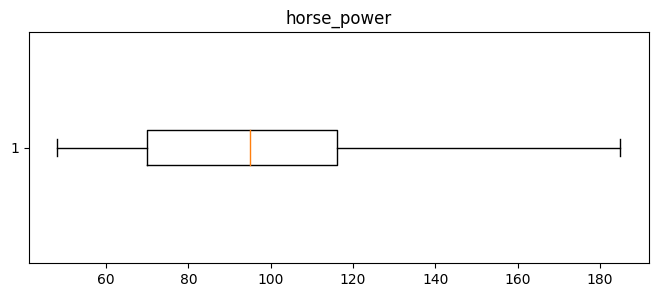

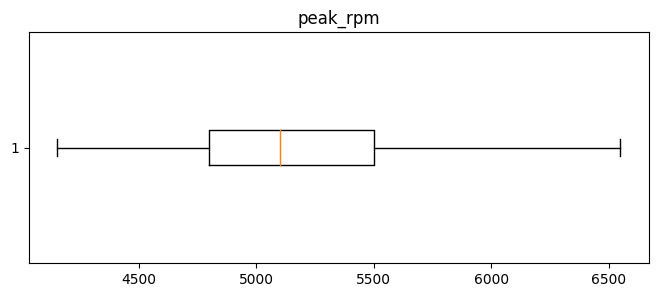

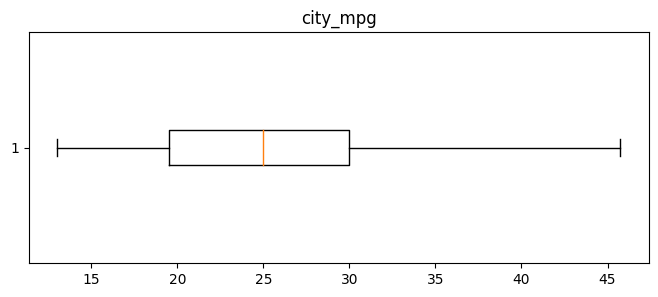

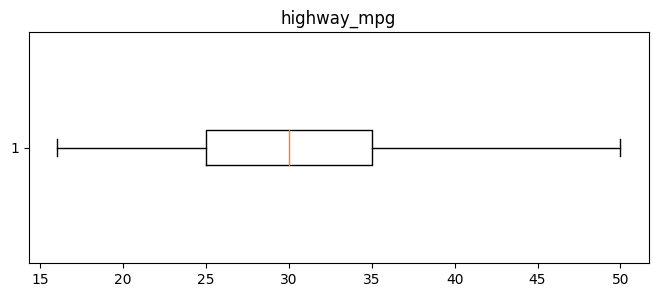

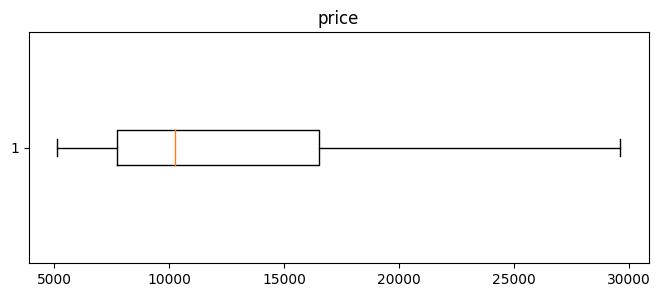

In [46]:
# plotting to check for removed outliers
for i in df3.columns[:-1]:
    plt.figure(figsize=(8,3))
    plt.boxplot(df3[[i]],vert=False)
    plt.title(i)
    plt.show()

In [57]:
df3.to_csv('df3.csv') #saving file

## 3. Multiple Regression Analysis ! Use the df2 dataset!

**1. Create a model that uses all the variables** and call it model1. The dependent variable is price, the independent variables are all the rest. Print out a summary of the model (coefficents, stanrard errors, confidence intervals and other metrics shown in class and answer the quesions based on your output.

In [50]:
##Your code goes here
# Here the cleaned dataset is df3
X=df3.drop(columns=['price']) # dropping price column since it is dependent variable and wont be used for training.
y=df3['price'] #target variable is price column
# X = sm.add_constant(X)

In [91]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)# Train-test split is 70-30.



In [92]:
# from sklearn.linear_model import LinearRegression
# model1 = LinearRegression()

In [93]:
# model1.fit(X_train,y_train) # fitting the model on dataset

In [94]:
# y_inter= model1.intercept_
# print(y_inter)
# m_coef= model1.coef_ #coefficients
# m_coef

In [95]:
# y_pred_train= model1.predict(X_train) # model prediction
# plt.scatter(y_train, y_pred_train)
# plt.xlabel('Actual price')
# plt. ylabel('Predicted price')
# plt.show()

In [96]:
# checking model accuracy
# from sklearn.metrics import r2_score
# r2_score(y_train, y_pred_train)

In [51]:
import statsmodels.api as sm
import statsmodels.formula. api as smf
model1 =smf.ols(formula="price ~ wheel_base +length+width+heights+curb_weight+engine_size+bore+stroke+comprassion+horse_power+peak_rpm+city_mpg+highway_mpg+fuel_type_gas", data=df3).fit()
# model1=sm.OLS(y_train,X_train).fit()

In [52]:
model1.summary(alpha=0.1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     86.04
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           7.33e-72
Time:                        20:38:08   Log-Likelihood:                -1796.9
No. Observations:                 195   AIC:                             3624.
Df Residuals:                     180   BIC:                             3673.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|       [0.05       0.95]
---------------------------------------------------------------------------------
Intercept     -3.732e+04   1.39e+04     -2.683      0.008   -6.03e+04   -1.43e+04
wheel_base      113.5402     84.494      1.344      0.181     -26.160     253.240
length          -78.7801     46.315     -1.701      0.091    -155.355      -2.205
width           548.5873    210.468      2.607      0.010     200.607     896.568
heights         142.7093    111.820      1.276      0.204     -42.169     327.588
curb_weight       2.4509      1.437      1.706      0.090       0.075       4.826
engine_size     107.2719     17.860      6.006      0.000      77.742     136.802
bore          -2224.1633    997.015     -2.231      0.027   -3872.590    -575.736
stroke        -4180.8103    837.906     -4.990      0.000   -5566.172   -2795.448
comprassion      66.1752    397.950      0.166      0.868    -591.780     724.131
horse_power      39.4122     16.429      2.399      0.017      12.249      66.576
peak_rpm          1.6080      0.579      2.775      0.006       0.650       2.566
city_mpg       -277.2131    144.154     -1.923      0.056    -515.551     -38.875
highway_mpg     237.4678    130.803      1.815      0.071      21.203     453.733
fuel_type_gas -3430.0239   1129.499     -3.037      0.003   -5297.496   -1562.552
==============================================================================
Omnibus:                        8.256   Durbin-Watson:                   0.737
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               12.547
Skew:                          -0.218   Prob(JB):                      0.00189
Kurtosis:                       4.163   Cond. No.                     4.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
# Get the residuals from the model
residuals1 = model1.resid
# Calculate the variance of the residuals
residual_variance1 = residuals1.var()
print("Variance of Residuals in Model 1:", residual_variance1) #variance

Variance of Residuals in Model 1: 5938411.7867267355


1. How do you interpret the intercept?
2. How many variables are statistically significant?
3. What is the variance of the model?
4. What is the coefficeint of determination and how do you interpret it?
5. What is the F-statistics used for? How do you interpret it for this model?

### Answers
1. The intercept is the average price of the car when all other features are 0. It is Intercept	-5.329e+04
2. From the OLS summary, if the t value can be greater or less than 0. If we take the confidence level to be 90%, then the features which have a P value
   less than 0.1 are considered statistically significant. So, in this case **wheel_base,heights and city_mpg** columns are 
   **less significant**. So, **11 columns are statistically significant**
3. The variance of model 1 was found to be 6242654.59
4. The coefficient of determination is represented as R-squared in the OLS summary. If the linear regression model is fit well, the R-squared value will
   be closer to 1. In this case, R-squared values is **0.863** which means the model is a good fit.
   If there is a lot of difference between R-squared value and adjusted R-squared value, this means that the dataset has features that are irrelevant.
5. F-statistic is used to analyze the overall statistical significance of the model. If the F-statistic value is really large and P value i.e.
   Prob(F-statistics) is close to zero, then we can reject Null hypothesis. Hence, it can be said, there is a relationship  between the dependent
   variable and the other features in the dataset. In our case **F-statistics value is 87.95** and **P values is 6.56e-71**. Therefore, this is an 
   acceptable model.

**2. Drop all the variables that are not statistically significant** at least at 90% confidence level. Run another regression model with price as the dependent variable and the rest of the variables as the independent variabls. Call it model2. Print a summary of the results and answer the questions bellow. 

In [162]:
## your code goes here
# X2=df3.drop(columns=['price', 'wheel_base', 'heights','city_mpg']) # dropping price column and other less significant columns
# y2=df3['price'] #target variable is price column
# X2 = sm.add_constant(X2)

In [163]:
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 0)# Train-test split is 70-30.

In [54]:
model2 =smf.ols(formula="price ~ length+width+curb_weight+engine_size+bore+stroke+comprassion+horse_power+peak_rpm+highway_mpg+fuel_type_gas", data=df3).fit()       
# model2=sm.OLS(y2_train,X2_train).fit()
model2.summary(alpha=0.1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     106.2
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           2.68e-73
Time:                        20:38:30   Log-Likelihood:                -1800.9
No. Observations:                 195   AIC:                             3626.
Df Residuals:                     183   BIC:                             3665.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|       [0.05       0.95]
---------------------------------------------------------------------------------
Intercept     -3.288e+04   1.29e+04     -2.552      0.012   -5.42e+04   -1.16e+04
length           -5.3239     36.955     -0.144      0.886     -66.419      55.771
width           560.9324    197.877      2.835      0.005     233.798     888.067
curb_weight       2.8385      1.412      2.010      0.046       0.504       5.173
engine_size     104.0716     17.820      5.840      0.000      74.611     133.533
bore          -2037.2377   1004.410     -2.028      0.044   -3697.751    -376.724
stroke        -4123.1957    834.200     -4.943      0.000   -5502.315   -2744.077
comprassion     -85.6479    396.202     -0.216      0.829    -740.658     569.363
horse_power      35.2902     15.870      2.224      0.027       9.054      61.526
peak_rpm          1.7237      0.583      2.956      0.004       0.760       2.688
highway_mpg      28.0714     74.135      0.379      0.705     -94.490     150.633
fuel_type_gas -3328.6979   1136.586     -2.929      0.004   -5207.728   -1449.667
==============================================================================
Omnibus:                        5.521   Durbin-Watson:                   0.688
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                8.060
Skew:                          -0.061   Prob(JB):                       0.0178
Kurtosis:                       3.989   Cond. No.                     4.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
# Get the residuals from the model
residuals2 = model2.resid
# Calculate the variance of the residuals
residual_variance2 = residuals2.var()
print("Variance of Residuals in model 2:", residual_variance2) # variance

Variance of Residuals in model 2: 6184804.647020893


1. How do you interpret the intercept?
2. How many variables are statistically significant?
3. What is the variance of the model?
4. What is the coefficeint of determination and how do you interpret it? What is the Adjusted R-squared and compare it to the model1's value. 
5. What is the F-statistics used for? How do you interpret it for this model?

### Answers
1. The intercept is the average price of the car when all other features are 0. It increased to Intercept -4.721e+04	
2. So, in this case **length and highway_mpg** columns are **less significant**. Hence **9 columns are statistically significant**
3. The variance of model 2 was found to be 6474684.98
4. In this case, R-squared values is **0.858** that is minutely different from model 1 and the model is a good fit.
   If there is a lot of difference between R-squared value and adjusted R-squared value, this means that the dataset has features that are irrelevant.
5. F-statistic is used to analyze the overall statistical significance of the model. If the F-statistic value is really large and P value i.e.
   Prob(F-statistics) is close to zero, then we can reject Null hypothesis. Hence, it can be said, there is a relationship  between the dependent
   variable and the other features in the dataset. In our case **F-statistics value is 111.4** and **P values is 1.58e-72**. Therefore, this is a good
   model. There might be a possibility where model two is better than model 1 because of the F-statistic value.

**3. Compare the two models with ANOVA**. What are your null and alternative hypothesis? What is your conclusion?

In [56]:
#comparing the two models
anova = sm.stats.anova_lm(model2, model1, test="F", typ=1)
print(anova)

   df_resid           ssr  df_diff       ss_diff         F    Pr(>F)
0     183.0  1.199852e+09      0.0           NaN       NaN       NaN
1     180.0  1.152052e+09      3.0  4.780021e+07  2.489482  0.061874


### The P value is less than 0.1, hence null hypothesis can be rejected.

### Answer
#### Null hypothesis is that all features can be used to predict the price. But it was found that wheel_base,heights,city_mpg,length and highway_mpg  were not statistically significant for prediction of dependent variable(price).


**4.Checking the assumptions:**
-What are the assumptions?

**Answer**:
1. The relationship between all indpendent variables and the dependent variable was assumed to be linear.
2. The features are assumed to have no multicollinearity.
3. Homoscedaticity

-Do they hold?

**Answer**: The above assumptions were proven to be wrong.

**5. Is there Multicollinearity in your data?**

In [150]:
#Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X should be the matrix of your independent variables
vif = pd.DataFrame()
vif["Variable"] = X2.columns
vif["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]


In [151]:
vif.round(2)

,Variable,VIF
0,const,4226.69
1,length,6.15
2,width,5.01
3,curb_weight,14.57
4,engine_size,10.30
5,bore,2.19
6,stroke,1.32
7,comprassion,2.13
8,horse_power,9.37
9,peak_rpm,1.97


#### Answer: Based on the above calculation, we can say that multicollinearity exists in the dataset.